# End-to-End Regression Project

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/housing.csv")

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


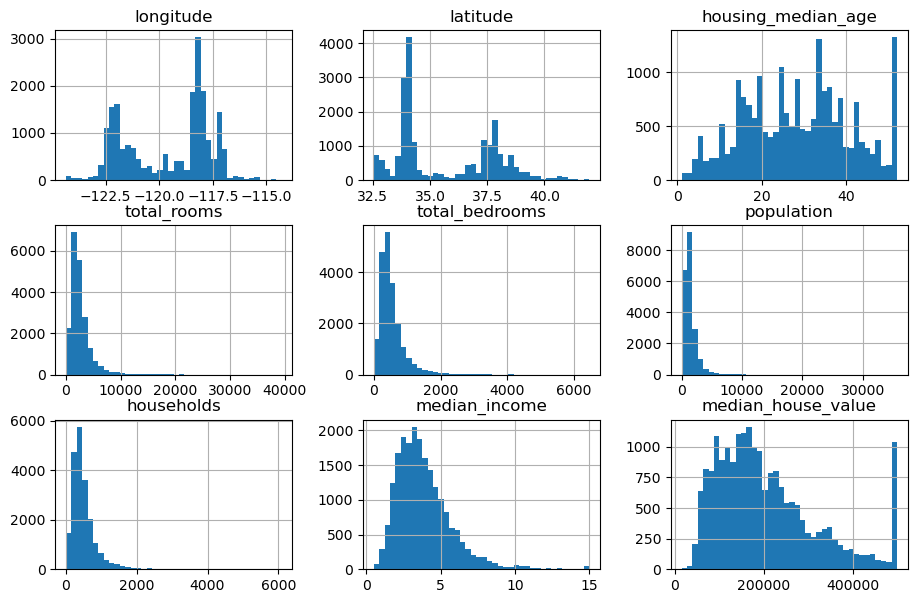

In [8]:
df.hist(bins=40, figsize=(11, 7));

## Test set

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
def shuffle_and_split_df(df: pd.DataFrame, test_ratio: float):
    np.random.seed(42)
    random_indices = np.random.permutation(len(df))
    test_set_size = int(len(df) * test_ratio)
    test_random_indices = random_indices[:test_set_size]
    train_random_indices = random_indices[test_set_size:]

    return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [16]:
train_set, test_set = shuffle_and_split_df(df, 0.2)

In [17]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5762,-118.29,34.16,31.0,1262.0,338.0,1019.0,332.0,3.7083,241900.0,<1H OCEAN
7085,-117.99,33.93,36.0,1287.0,233.0,779.0,229.0,4.8523,175800.0,<1H OCEAN
16553,-121.24,37.82,9.0,6169.0,959.0,3378.0,945.0,5.1047,157900.0,INLAND
11587,-118.02,33.78,28.0,3375.0,559.0,1754.0,554.0,5.5446,228900.0,<1H OCEAN
15726,-122.45,37.78,43.0,1452.0,397.0,897.0,393.0,4.1319,322700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
14179,-117.06,32.73,33.0,3444.0,619.0,1884.0,582.0,3.7891,126700.0,NEAR OCEAN
4810,-118.36,34.02,43.0,1356.0,333.0,796.0,329.0,1.7159,189700.0,<1H OCEAN
16602,-120.69,35.62,43.0,3044.0,652.0,1456.0,608.0,2.4567,140000.0,<1H OCEAN
1930,-121.06,38.70,9.0,13255.0,1739.0,5001.0,1627.0,6.3140,228900.0,INLAND


In [18]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1048,-120.65,38.42,23.0,1538.0,305.0,730.0,267.0,2.6078,116700.0,INLAND
855,-122.02,37.58,15.0,3052.0,760.0,2097.0,728.0,3.3617,178100.0,NEAR BAY
20025,-119.05,36.07,21.0,2472.0,523.0,1238.0,504.0,1.7756,62900.0,INLAND
819,-122.07,37.63,35.0,1931.0,376.0,1175.0,337.0,3.7292,168100.0,NEAR BAY
2367,-119.56,36.71,29.0,1963.0,392.0,1208.0,398.0,2.5741,73000.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11128,-117.93,33.85,27.0,1962.0,544.0,1492.0,481.0,1.9621,118100.0,<1H OCEAN
3485,-118.55,34.28,16.0,8879.0,NaN,3468.0,1200.0,8.1125,428600.0,<1H OCEAN
7586,-118.23,33.90,31.0,2143.0,522.0,2276.0,519.0,1.8095,100800.0,<1H OCEAN
19025,-121.99,38.34,13.0,3252.0,610.0,1915.0,631.0,4.2137,151700.0,INLAND


In [19]:
from zlib import crc32  # Cycling Redundancy Check

In [21]:
crc32(np.int64(10))

4108501921

In [22]:
def is_identifier_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

In [23]:
def split_train_test_with_identifier_hash(df, test_ratio, identifier_column):
    identifiers = df[identifier_column]
    in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
    return df.loc[~in_test_set], df.loc[in_test_set]

In [24]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

In [25]:
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
test_set